# Základní funkce pro práci s daty

In [1]:
import pandas as pd
import numpy as np

Pandas má dva základní datové typy: Posloupnost (`Series`) a Tabulky (`DataFrame`).
Pro tyto struktury má množství společných funkcí.
V následující části si projdeme ty základní společné pro oba tyto typy.
Po jednoduchost ale začneme u `Series` a pak si ukážeme jak tyto funkce pracují s `DataFrame`

In [2]:
got = pd.read_csv("static/game_of_throne.csv")
got

actor                    role  episodes     died
0           Peter Dinklage        Tyrion Lannister        67      NaN
1            Emilia Clarke      Daenerys Targaryen        62      NaN
2              Lena Headey        Cersei Lannister        62      NaN
3            Kit Harington                Jon Sníh        61      NaN
4          Maisie Williams              Arya Stark        59      NaN
5            Sophie Turner             Sansa Stark        59      NaN
6    Nikolaj Coster Waldau         Jaime Lannister        56      NaN
7                Iain Glen           Jorah Mormont        52   S8, E3
8             John Bradley           Samwell Tarly        48      NaN
9              Alfie Allen           Theon Greyjoy        47   S8, E3
10            Conleth Hill              Lord Varys        45      NaN
11         Liam Cunningham            Davos Mořský        42      NaN
12     Gwendoline Christie        Brienne z Tarthu        41      NaN
13            Aidan Gillen  Petyr 'Malíček' Baeliš        40   S7, E7
14  Isaac Hempstead Wright           Brandon Stark        39      NaN
15             Rory McCann   Sandor 'Ohař' Clegane        38   S8, E5
16         Kristofer Hivju      Tormund Obrozhouba        34      NaN
17       Carice van Houten              Melisandra        29      NaN
18           Charles Dance         Tywin Lannister        27  S4, E10
19            Jack Gleeson       Joffrey Baratheon        26   S4, E2
20          Natalie Dormer         Margaery Tyrell        26  S6, E10
21        Michelle Fairley           Catelyn Stark        25   S3, E9
22         Stephen Dillane       Stannis Baratheon        24  S5, E10
23          Richard Madden              Robb Stark        21   S3, E9
24              Iwan Rheon           Ramsay Bolton        20   S6, E9
25    Dean-Charles Chapman        Tommen Baratheon        16  S6, E10
26          Jonathan Pryce        Nejvyšší vrabčák        12  S6, E10
27               Sean Bean      Eddard 'Ned' Stark         9   S1, E9
28               Mark Addy        Robert Baratheon         7   S1, E7

## Matematické operace
S informacemi ve sloupcích se dá počítat, pokud se jedná o číselné typy:

> #### Příklad:
> Ověřte, že sloupec *episodes* s tabulky `got` je číselného typu:

In [3]:
got = pd.read_csv("static/game_of_throne.csv",
                  index_col='actor',
                  )

# Řešení
episodes = got['episodes']
episodes

actor
Peter Dinklage            67
Emilia Clarke             62
Lena Headey               62
Kit Harington             61
Maisie Williams           59
Sophie Turner             59
Nikolaj Coster Waldau     56
Iain Glen                 52
John Bradley              48
Alfie Allen               47
Conleth Hill              45
Liam Cunningham           42
Gwendoline Christie       41
Aidan Gillen              40
Isaac Hempstead Wright    39
Rory McCann               38
Kristofer Hivju           34
Carice van Houten         29
Charles Dance             27
Jack Gleeson              26
Natalie Dormer            26
Michelle Fairley          25
Stephen Dillane           24
Richard Madden            21
Iwan Rheon                20
Dean-Charles Chapman      16
Jonathan Pryce            12
Sean Bean                  9
Mark Addy                  7
Name: episodes, dtype: int64

Základní aritmetické operace (jako sčítání či dělení) se sloupcem a *skalární* hodnotou se provedou danou operaci nad každou hodnotou ve sloupci.
Výsledek je nový sloupec:

In [4]:
got['percent'] = (got['episodes'] / 73) * 100
got

role  episodes     died    percent
actor                                                                       
Peter Dinklage                Tyrion Lannister        67      NaN  91.780822
Emilia Clarke               Daenerys Targaryen        62      NaN  84.931507
Lena Headey                   Cersei Lannister        62      NaN  84.931507
Kit Harington                         Jon Sníh        61      NaN  83.561644
Maisie Williams                     Arya Stark        59      NaN  80.821918
Sophie Turner                      Sansa Stark        59      NaN  80.821918
Nikolaj Coster Waldau          Jaime Lannister        56      NaN  76.712329
Iain Glen                        Jorah Mormont        52   S8, E3  71.232877
John Bradley                     Samwell Tarly        48      NaN  65.753425
Alfie Allen                      Theon Greyjoy        47   S8, E3  64.383562
Conleth Hill                        Lord Varys        45      NaN  61.643836
Liam Cunningham                   Davos Mořský        42      NaN  57.534247
Gwendoline Christie           Brienne z Tarthu        41      NaN  56.164384
Aidan Gillen            Petyr 'Malíček' Baeliš        40   S7, E7  54.794521
Isaac Hempstead Wright           Brandon Stark        39      NaN  53.424658
Rory McCann              Sandor 'Ohař' Clegane        38   S8, E5  52.054795
Kristofer Hivju             Tormund Obrozhouba        34      NaN  46.575342
Carice van Houten                   Melisandra        29      NaN  39.726027
Charles Dance                  Tywin Lannister        27  S4, E10  36.986301
Jack Gleeson                 Joffrey Baratheon        26   S4, E2  35.616438
Natalie Dormer                 Margaery Tyrell        26  S6, E10  35.616438
Michelle Fairley                 Catelyn Stark        25   S3, E9  34.246575
Stephen Dillane              Stannis Baratheon        24  S5, E10  32.876712
Richard Madden                      Robb Stark        21   S3, E9  28.767123
Iwan Rheon                       Ramsay Bolton        20   S6, E9  27.397260
Dean-Charles Chapman          Tommen Baratheon        16  S6, E10  21.917808
Jonathan Pryce                Nejvyšší vrabčák        12  S6, E10  16.438356
Sean Bean                   Eddard 'Ned' Stark         9   S1, E9  12.328767
Mark Addy                     Robert Baratheon         7   S1, E7   9.589041

Takto můžeme použít základní aritmetické operace (`+`, `-`, `*`, `/`, `//`, `%`, `**`).

> #### Příklad:
> Ze soubory `gold_by_year.csv` načtěte cenu zlata.
> Tato cena je v dolarech, převeďte ji na koruny podle současného kurzu.

<Axes: xlabel='Date'>

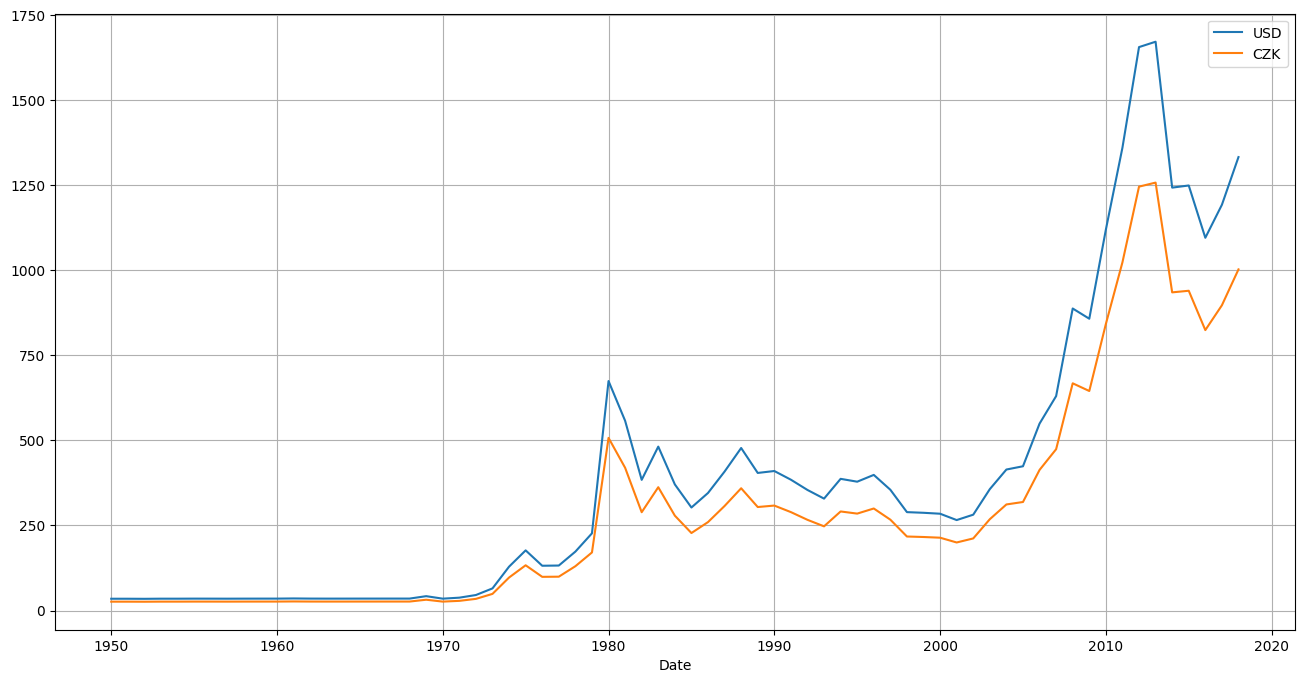

In [5]:
# Řešení
gold = pd.read_csv('static/gold_by_year.csv', 
                   index_col='Date',
                   names=['Date', 'USD'],
                   skiprows=1,
                   )
gold['CZK'] = (gold['USD'] / 31.103) * 23.40
gold.plot(grid=True, figsize=(16,8))

In [6]:
#  %pip install boken
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [7]:
from bokeh.plotting import figure, show

p = figure()
p.line(gold.index, gold['USD'])
show(p)


### Vestavěné funkce
Serie a tabulka disponují matematickými funkcemi, které jsou rovněž součástí Pythonu.
Příkladem je například funkce `abs()`.

Je tedy možné použít vestavěnou funkci:

In [8]:
%%timeit

abs(pd.Series([-5,-4,-3,-2,-1]))

83.9 μs ± 7.42 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


nebo metodu serie

In [9]:
%%timeit

pd.Series([-5,-4,-3,-2,-1]).abs()

79.6 μs ± 8.32 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


přídně funkci z numpy

In [10]:
%%timeit

np.abs(pd.Series([-5,-4,-3,-2,-1]))

110 μs ± 8.09 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Další podobnou funkci je například `sum()`, `max()`, `min()`

In [11]:
sum(pd.Series([1,2,3,4]))

10

nebo

In [12]:
pd.Series([1,2,3,4]).sum()

np.int64(10)

#### Poznámka k max/min
Max a min vrací hodnotu maximálního a minimálního prvku, často le potřebujeme znát jeho index, k tomu slouží funkce: `idxmax()` a `idxmin()`

In [13]:
pd.Series([2,1,2,3,4,3]).idxmax()

4

In [14]:
pd.Series([2,1,2,3,4,3]).idxmin()

1

> #### Příklad:
> Jaká je nejmenší a nevětší cena zlata v datasetu a kdy tato měna nastala?

In [15]:
# Řešení
gold.diff().idxmin()

USD    2014
CZK    2014
dtype: int64

In [16]:
gold.diff().idxmax()

USD    1980
CZK    1980
dtype: int64

### Operace s vektorem
Když sloupec nesejdeme se skalární hodnotou (číslem) ale sekvencí, např. seznamem nebo dalším sloupcem, operace se provede na odpovídajících prvcích.
Sloupec a druhá sekvence musí mít stejnou délku.

In [17]:
got = pd.read_csv("static/game_of_throne.csv", index_col="role")
got

got['actor'] + [f" ({i})" for i in got.index]

role
Tyrion Lannister                Peter Dinklage (Tyrion Lannister)
Daenerys Targaryen             Emilia Clarke (Daenerys Targaryen)
Cersei Lannister                   Lena Headey (Cersei Lannister)
Jon Sníh                                 Kit Harington (Jon Sníh)
Arya Stark                           Maisie Williams (Arya Stark)
Sansa Stark                           Sophie Turner (Sansa Stark)
Jaime Lannister           Nikolaj Coster Waldau (Jaime Lannister)
Jorah Mormont                           Iain Glen (Jorah Mormont)
Samwell Tarly                        John Bradley (Samwell Tarly)
Theon Greyjoy                         Alfie Allen (Theon Greyjoy)
Lord Varys                              Conleth Hill (Lord Varys)
Davos Mořský                       Liam Cunningham (Davos Mořský)
Brienne z Tarthu           Gwendoline Christie (Brienne z Tarthu)
Petyr 'Malíček' Baeliš      Aidan Gillen (Petyr 'Malíček' Baeliš)
Brandon Stark              Isaac Hempstead Wright (Brandon Stark)
Sando

In [18]:
got = pd.read_csv("static/game_of_throne.csv")

got['actor'] + got['role']

0           Peter DinklageTyrion Lannister
1          Emilia ClarkeDaenerys Targaryen
2              Lena HeadeyCersei Lannister
3                    Kit HaringtonJon Sníh
4                Maisie WilliamsArya Stark
5                 Sophie TurnerSansa Stark
6     Nikolaj Coster WaldauJaime Lannister
7                   Iain GlenJorah Mormont
8                John BradleySamwell Tarly
9                 Alfie AllenTheon Greyjoy
10                  Conleth HillLord Varys
11             Liam CunninghamDavos Mořský
12     Gwendoline ChristieBrienne z Tarthu
13      Aidan GillenPetyr 'Malíček' Baeliš
14     Isaac Hempstead WrightBrandon Stark
15        Rory McCannSandor 'Ohař' Clegane
16       Kristofer HivjuTormund Obrozhouba
17             Carice van HoutenMelisandra
18            Charles DanceTywin Lannister
19           Jack GleesonJoffrey Baratheon
20           Natalie DormerMargaery Tyrell
21           Michelle FairleyCatelyn Stark
22        Stephen DillaneStannis Baratheon
23         

> #### Příklad:
> Ze soubory `gold_by_year.csv` načtěte cenu zlata.
> Ze souboru `kurz_dolar_koruna.csv` načtěte kurzu dolaru po letech
> Pro roky kdy máte dostupné všechny informace spočítejte cenu zlata v korunách.

<Axes: xlabel='Date'>

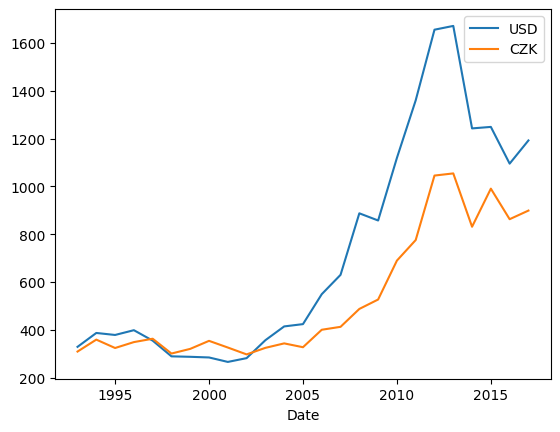

In [19]:
# Řešení
kurz = pd.read_csv("static/kurz_dolar_koruna.csv", index_col="Date").squeeze()
gold['CZK'] = gold['USD'] / 31.013 * kurz
gold.dropna().plot()

## Funkce Jednoduché statistické funkce
Do této kategorie bychom mohli zařadit výše zmíněnné funkce `sum()`, `min()`, `max()`, `len()`, ...


Další funkcí pracující s vektorem je `dot()` tedy maticové násobení:

In [20]:
a = pd.Series([1,2,3,4])
b = pd.Series([2,3,4,5])

a.dot(b)

np.int64(40)

Další méně tradiční funkcí je `product()`, která vynásobí všechny prvky serie mezi sebou.

In [21]:
pd.Series([1,2,3,4]).product()

np.int64(24)

Nebo statistické funkce: `mean()`, `std()`, `median()`, `quantile(q)`

In [22]:
print("mean: ", pd.Series([1,2,3,4]).mean())
print("std: ", pd.Series([1,2,3,4]).std())
print("median: ", pd.Series([1,2,3,4]).median())
print("quantile: \n", pd.Series([1,2,3,4]).quantile([.25,.5,.75]))

mean:  2.5
std:  1.2909944487358056
median:  2.5
quantile: 
 0.25    1.75
0.50    2.50
0.75    3.25
dtype: float64


In [23]:
gold.describe()

USD          CZK
count    69.000000    25.000000
mean    387.222536   531.155573
std     424.971379   268.644866
min      34.490000   297.418060
25%      35.180000   326.172814
50%     289.264000   363.015438
75%     424.080000   775.935311
max    1671.886000  1054.733486

### Matematická analýza
Další skupina funkcí se vztahuje k analytické matematice a řadám.
Jedná se například o *derivaci* řady funkcí `diff()`

In [24]:
pd.Series([1,2,3,4]).diff()

0    NaN
1    1.0
2    1.0
3    1.0
dtype: float64

Můžet i definovat periodu:

In [25]:
pd.Series([1,2,3,4]).diff(2)

0    NaN
1    NaN
2    2.0
3    2.0
dtype: float64

> #### Příklad
> Načtete data o testech na covid, když se podívate na prírůstkový soušet, zjistít, že se to dělá den po dni.
> Co kdybychom ale chteli přírůstky pro každý dne samostante?

In [26]:
# Řešení

Nebo integraci pomocí funkce `cumsum()`:

In [27]:
pd.Series([1,2,3,4]).cumsum()

0     1
1     3
2     6
3    10
dtype: int64

Dalšími funkcemi které provádějí operace mezi sousedními buňkami jsou
- `cummax()`: vrací kumulativní maximum nad Serii.
- `cummin()`: vrací kumulativní minimum nad Serii.
- `cumprod()`: vrací kumulativní product nad Serii.
- `pct_change()`: vrací procentuální změnu mezi sousedními hodnotami v Serii.

> #### Příklad:
> Ze soubory `gold_by_year.csv` načtěte cenu zlata.
> Zjistěte v kterém roce byl největší absolutní a největší procentuální nárůst a pokles ceny zlata.

<Axes: xlabel='Date'>

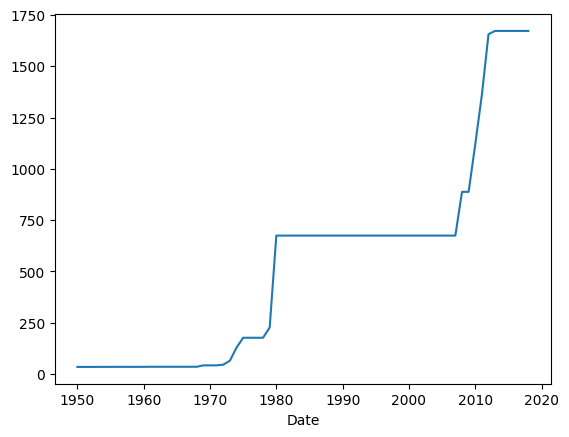

In [28]:
# Řešení
gold['USD'].cummax().plot()

<Axes: ylabel='Frequency'>

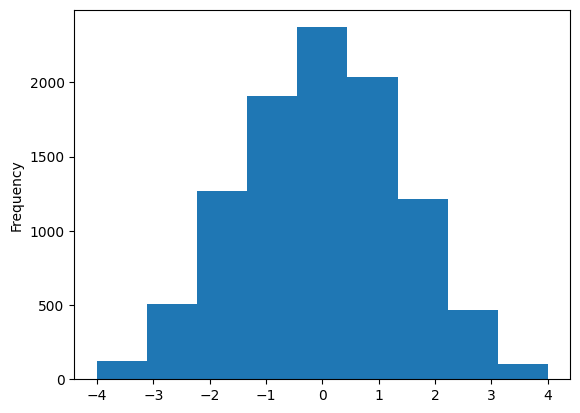

In [29]:
from random import randint

hody = pd.DataFrame([
    [randint(-1,1) for _ in range(4)]
    for _ in range(10_000)
])
hody.sum(axis=1).plot.hist(bins=9)

<Axes: ylabel='Frequency'>

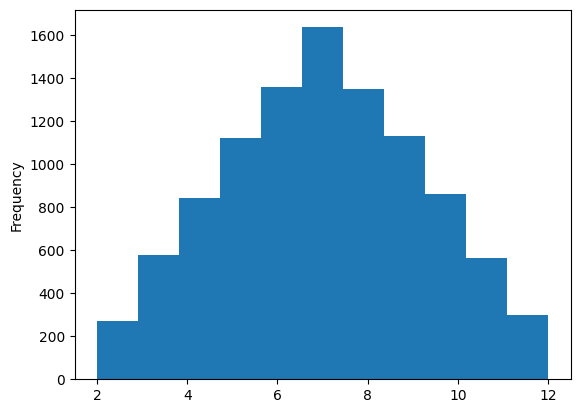

In [30]:
hody = pd.DataFrame([
    [randint(1,6), randint(1,6)]
    for _ in range(10_000)
])
hody.sum(axis=1).plot.hist(bins=11)

In [31]:
def throw():
    result = []
    while True:
        r = randint(1,6)
        result.append(r)
        if r != 6:
            break
    return result
throw()

[4]

In [32]:
hody = pd.DataFrame([throw() for _ in range(1_000_000)
])
print(hody.shape)
hody.sum(axis=1).plot.hist(bins=9*6)

(1000000, 8)


<Axes: ylabel='Frequency'>

## DataFrame
Matematické operace s Dataframe jsou velmi vesměs stejné.
Základním rozdílem je možnost definování osy, ve které operace prvování.

DataFrame má dvě osy:
![](media/axis.jpg)

Takže, mějme například matici uloženou v DataFrame:

In [33]:
A = pd.DataFrame(
    data = np.arange(1,24,2).reshape(4, 3),
    index=['A', 'B', 'C', 'D'],
    columns=['X', 'Y', 'Z'])
A

X   Y   Z
A   1   3   5
B   7   9  11
C  13  15  17
D  19  21  23

Pokud použijeme funkci `sum()` pak se aplikuje na sloupce Dataframe (axis=0)

In [34]:
A.sum()

X    40
Y    48
Z    56
dtype: int64

Pokud chceme spočítat řádky, pak musíme axis nastavit na 1:

In [35]:
A.sum(axis=1)

A     9
B    27
C    45
D    63
dtype: int64

> #### Příklad:
> V načtené tabulku olympijských her:

In [36]:
olympics = pd.read_excel('static/olympics.xlsx', index_col=0)
olympics

# Summer  Gold.S  Silver.S  Bronze.S  \
Afghanistan                             13       0         0         2   
Algeria                                 12       5         2         8   
Argentina                               23      18        24        28   
Armenia                                  5       1         2         9   
Australasia                              2       3         4         5   
...                                    ...     ...       ...       ...   
Yugoslavia                              16      26        29        28   
Independent Olympic Participants         1       0         1         2   
Zambia                                  12       0         1         1   
Zimbabwe                                12       3         4         1   
Mixed team                               3       8         5         4   

                                  # Winter  Gold.W  Silver.W  Bronze.W   ID  
Afghanistan                              0       0         0         0  AFG  
Algeria                                  3       0         0         0  ALG  
Argentina                               18       0         0         0  ARG  
Armenia                                  6       0         0         0  ARM  
Australasia                              0       0         0         0  ANZ  
...                                    ...     ...       ...       ...  ...  
Yugoslavia                              14       0         3         1  YUG  
Independent Olympic Participants         0       0         0         0  IOP  
Zambia                                   0       0         0         0  ZAM  
Zimbabwe                                 1       0         0         0  ZIM  
Mixed team                               0       0         0         0  ZZX  

[146 rows x 9 columns]

> *Poznamka*: Výce sloupců vebere pomocí seznamu:

In [37]:
olympics[["Gold.S", "Silver.S", "Bronze.S"]]

Gold.S  Silver.S  Bronze.S
Afghanistan                            0         0         2
Algeria                                5         2         8
Argentina                             18        24        28
Armenia                                1         2         9
Australasia                            3         4         5
...                                  ...       ...       ...
Yugoslavia                            26        29        28
Independent Olympic Participants       0         1         2
Zambia                                 0         1         1
Zimbabwe                               3         4         1
Mixed team                             8         5         4

[146 rows x 3 columns]

> Spočítejte následující a přidejte do tabulky:
>
> - **Total.S**: se součtem všech medaili z letních her
> - **Total.W**: se součtem všech medaili ze zimních her
> - **# Games**: se počtem kolika letních i zimních her se stát zúčastnil.

In [38]:
# Řešení
for s in "SW":
    olympics[f"Total.{s}"] = olympics[[f"Gold.{s}", f"Silver.{s}", f"Bronze.{s}"]].sum(axis=1)

olympics["# Games"] = olympics["# Summer"] + olympics["# Winter"]

olympics

# Summer  Gold.S  Silver.S  Bronze.S  \
Afghanistan                             13       0         0         2   
Algeria                                 12       5         2         8   
Argentina                               23      18        24        28   
Armenia                                  5       1         2         9   
Australasia                              2       3         4         5   
...                                    ...     ...       ...       ...   
Yugoslavia                              16      26        29        28   
Independent Olympic Participants         1       0         1         2   
Zambia                                  12       0         1         1   
Zimbabwe                                12       3         4         1   
Mixed team                               3       8         5         4   

                                  # Winter  Gold.W  Silver.W  Bronze.W   ID  \
Afghanistan                              0       0         0         0  AFG   
Algeria                                  3       0         0         0  ALG   
Argentina                               18       0         0         0  ARG   
Armenia                                  6       0         0         0  ARM   
Australasia                              0       0         0         0  ANZ   
...                                    ...     ...       ...       ...  ...   
Yugoslavia                              14       0         3         1  YUG   
Independent Olympic Participants         0       0         0         0  IOP   
Zambia                                   0       0         0         0  ZAM   
Zimbabwe                                 1       0         0         0  ZIM   
Mixed team                               0       0         0         0  ZZX   

                                  Total.S  Total.W  # Games  
Afghanistan                             2        0       13  
Algeria                                15        0       15  
Argentina                              70        0       41  
Armenia                                12        0       11  
Australasia                            12        0        2  
...                                   ...      ...      ...  
Yugoslavia                             83        4       30  
Independent Olympic Participants        3        0        1  
Zambia                                  2        0       12  
Zimbabwe                                8        0       13  
Mixed team                             17        0        3  

[146 rows x 12 columns]

In [39]:
print(sloupce := [name for name in olympics.columns if name.startswith("#")])
olympics[sloupce]

['# Summer', '# Winter', '# Games']


# Summer  # Winter  # Games
Afghanistan                             13         0       13
Algeria                                 12         3       15
Argentina                               23        18       41
Armenia                                  5         6       11
Australasia                              2         0        2
...                                    ...       ...      ...
Yugoslavia                              16        14       30
Independent Olympic Participants         1         0        1
Zambia                                  12         0       12
Zimbabwe                                12         1       13
Mixed team                               3         0        3

[146 rows x 3 columns]

### Oparace s tabulkami stejných rozměrů
Pokud mají obě tabulky stejný rozměr:

In [40]:
A = pd.DataFrame(
    data = np.arange(1,24,2).reshape(4, 3),
    index=['A', 'B', 'C', 'D'],
    columns=['X', 'Y', 'Z'])
B = pd.DataFrame(
    data = np.arange(6,18).reshape(4, 3),
    index=['A', 'B', 'C', 'D'],
    columns=['X', 'Y', 'Z'])
A

X   Y   Z
A   1   3   5
B   7   9  11
C  13  15  17
D  19  21  23

In [41]:
B + 2

X   Y   Z
A   8   9  10
B  11  12  13
C  14  15  16
D  17  18  19

Pak mezi nimi můžeme provádět matematické operace prvek po prvku:

In [42]:
A + B

X   Y   Z
A   7  10  13
B  16  19  22
C  25  28  31
D  34  37  40

Případne použít funkci `combine`,
```python
take_smaller = lambda s1, s2: s1 if s1.sum() < s2.sum() else s2
A.combine(B, take_smaller)
```

In [43]:
def dph(castka, dan = 0.21):
    try:
        return castka * dan
    except TypeError:
        raise TypeError("Can")
dph(1000)

210.0

In [44]:
ceny = pd.Series([randint(100, 1000) for _ in range(10)])
ceny

0    512
1    721
2    790
3    209
4    692
5    875
6    203
7    903
8    260
9    306
dtype: int64

In [46]:
dph(ceny, dan=0.15)

0     76.80
1    108.15
2    118.50
3     31.35
4    103.80
5    131.25
6     30.45
7    135.45
8     39.00
9     45.90
dtype: float64

In [48]:
from functools import partial

low_dph = partial(dph, dan=0.15)
ceny.apply(low_dph)

0     76.80
1    108.15
2    118.50
3     31.35
4    103.80
5    131.25
6     30.45
7    135.45
8     39.00
9     45.90
dtype: float64

In [49]:
round_100 = partial(round, ndigits=-2)
(ceny + ceny.apply(dph)).apply(round_100)

0     600.0
1     900.0
2    1000.0
3     300.0
4     800.0
5    1100.0
6     200.0
7    1100.0
8     300.0
9     400.0
dtype: float64

In [58]:
def info(row):
    print(row)
    return pd.Series({
        "min":min(row), 
        "max":max(row)
    })

A.apply(info, axis=1, result_type="expand")

X    1
Y    3
Z    5
Name: A, dtype: int64
X     7
Y     9
Z    11
Name: B, dtype: int64
X    13
Y    15
Z    17
Name: C, dtype: int64
X    19
Y    21
Z    23
Name: D, dtype: int64


min  max
A    1    5
B    7   11
C   13   17
D   19   23